In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import model
from gen_contact_tensors import gen_contact_tensors

## Expected U matrix :

{'1A': [125, 152, 154, 155, 156, 157, 159, 161, 162, 163, 164, 165, 166, 167, 168, 172, 173, 174, 175, 176, 178, 180, 181], '1B': [94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 160, 169, 231, 235, 240, 241], '2A': [74, 75, 76, 77, 78, 79, 80, 82, 83, 87, 88, 89, 90, 91, 228, 229, 230, 234, 236, 237, 238, 239], '2B': [117, 118, 120, 122, 124, 127, 129, 130, 138, 142, 144, 149, 204, 206, 207, 209, 211, 212, 215, 216, 218, 220, 222, 223, 226, 227], '3A': [128, 131, 132, 133, 134, 140, 141, 143, 148, 158, 170, 171, 177, 182, 183, 188, 192, 194, 195, 197, 201, 202, 210, 232, 233], '3B': [55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 72, 109, 116, 121, 126, 135, 137, 139, 145], '4A': [33, 36, 37, 40, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 81, 119, 136, 179, 189, 200], '4B': [73, 84, 85, 184, 185, 186, 187, 190, 191, 193, 196, 198, 199, 203, 208, 213, 214, 217, 219, 221, 224, 225], '5A': [12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 27, 30

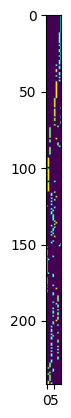

In [78]:
individuals = np.arange(242)
groups = np.array(['1A', '1B', '2A', '2B', '3A', '3B', '4A', '4B', '5A', '5B'])
unfound = np.array([])
dictgroups = {'1A' : [], '1B' : [], '2A' : [], '2B' : [], '3A' : [], '3B' : [], '4A' : [], '4B' : [], '5A' : [], '5B' : []}

U = np.zeros((len(individuals), len(groups)))

data = np.genfromtxt("../data/modified_data_test.csv", usecols=[1, 3], dtype=str)

for k in individuals:
    try :
        a = np.where(data[:, 0] == str(k))[0][0]
    except:
        unfound = np.append(unfound, k)
    if data[a, 1] != "Teachers":
        dictgroups[data[a, 1]].append(k)
        b = np.where(groups == data[a, 1])[0][0]
        U[k, b] = 1

U[195, 7] = 1
U[241, 3] = 1

plt.imshow(U)
print(dictgroups)




In [73]:
model = model("../data/modified_data_test.csv", 10, 3600)
model.MU(100)

100%|██████████| 100/100 [00:15<00:00,  6.37it/s]


[2 2 4 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 2 6 2 2 6 6 2 2 6 2 2 6 6 6 7 6 6 7
 7 2 6 7 6 4 6 7 7 7 7 7 7 7 7 7 7 7 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 2 2 3 8
 5 5 5 5 5 5 5 7 5 5 8 8 6 5 5 5 5 5 0 7 9 9 9 9 9 9 6 9 9 9 9 9 9 9 9 3 9
 9 9 9 9 9 3 0 0 7 0 3 0 3 0 8 3 0 3 0 0 3 3 3 3 3 7 3 0 3 3 3 0 3 0 3 9 3
 3 0 2 6 8 8 8 8 8 8 3 8 9 8 8 8 8 8 8 8 8 9 3 3 8 8 8 8 8 3 8 7 8 8 3 3 8
 8 8 8 3 7 8 8 3 4 3 2 8 3 4 8 7 3 3 4 0 5 0 0 4 0 3 0 0 8 4 0 0 8 0 4 0 8
 0 0 8 4 0 0 5 5 5 9 3 8 5 9 5 5 5 5 9 5]
{'g0': [92, 117, 118, 120, 122, 124, 127, 129, 130, 138, 142, 144, 149, 204, 206, 207, 209, 211, 212, 215, 216, 218, 220, 222, 223, 226, 227], 'g1': [], 'g2': [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 19, 21, 22, 25, 26, 28, 29, 38, 61, 67, 70, 71, 150, 195], 'g3': [55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 72, 109, 116, 121, 123, 126, 128, 131, 132, 133, 134, 135, 137, 139, 140, 141, 143, 145, 147, 148, 158, 170, 171, 177, 182, 183, 188, 192, 194, 197, 201, 202, 210, 232], 'g4': [2, 42, 193, 198, 2

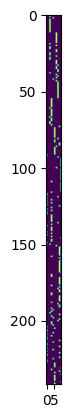

In [87]:
indicedesmaxs = np.argmax(model.U, axis=1)
print(indicedesmaxs)
Umodelise = np.zeros((242, 10))
Umodelise[np.arange(242), indicedesmaxs] = 1
plt.imshow(Umodelise)

dictgroupsmodel = {'g0' : [], 'g1' : [], 'g2' : [], 'g3' : [], 'g4' : [], 'g5' : [], 'g6' : [], 'g7' : [], 'g8' : [], 'g9' : []}
for k in range(242):
    dictgroupsmodel[f'g{indicedesmaxs[k]}'].append(k)

print(dictgroupsmodel)


